<a id="5"></a>


<font color="black" size=+1><b> Classification of Tuberculosis Disease from 2019-2021 using Artificial Neural Network (ANN) </b></font>

<a id="4"></a>

---
<font color="GREEN" size=+1><b>  Kelompok 4 -Modelling </b></font>

---
    Nama Anggota
    1. Nadya Dioranta Tambunan        DS04037
    2. Agnes Veronika Sihombing       DS04032
    4. Hanna Dhea Christi Sihombing   DS04043

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from numpy.core.defchararray import add
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAMI/data_dami.csv')
df

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
1,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
2,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
3,75453396,75453396,1959-08-25,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,JAWA TENGAH,BLORA,...,RAWAT INAP,RJTP,BUKAN PEKERJA,R06 Abnormalities of breathing,R06,R060,Dyspnoea,Evakuasi medis / Ambulans Darat,161700,161700
4,75453396,75453396,1959-08-25,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,JAWA TENGAH,BLORA,...,RAWAT INAP,RJTP,BUKAN PEKERJA,R06 Abnormalities of breathing,R06,R060,Dyspnoea,Evakuasi medis / Ambulans Darat,161700,161700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,426032113,408166141,1982-09-10,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,SULAWESI SELATAN,TAKALAR,...,NON RAWAT INAP,RITP,PBI APBN,R19 Other symptoms and signs involving the dig...,R19,R198,Other specified symptoms and signs involving t...,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
109475,426032113,408166141,1982-09-10,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,SULAWESI SELATAN,TAKALAR,...,NON RAWAT INAP,RITP,PBI APBN,R19 Other symptoms and signs involving the dig...,R19,R198,Other specified symptoms and signs involving t...,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
109476,402406574,402406574,1959-09-09,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,NUSA TENGGARA BARAT,SUMBAWA,...,RAWAT INAP,RJTP,PBI APBN,K29 Gastritis and duodenitis,K29,K297,"Gastritis, unspecified",Evakuasi medis / Ambulans Darat,80000,80000
109477,402406574,402406574,1959-09-09,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,NUSA TENGGARA BARAT,SUMBAWA,...,RAWAT INAP,RJTP,PBI APBN,K29 Gastritis and duodenitis,K29,K297,"Gastritis, unspecified",Evakuasi medis / Ambulans Darat,80000,80000


### Check Missing Value

In [ ]:
df.isna().sum()

PSTV01         0
PSTV02         0
PSTV03         0
PSTV04         0
PSTV05         0
PSTV06         0
PSTV07         0
PSTV08         0
PSTV09         0
PSTV10         0
PSTV11         0
PSTV12         0
PSTV13         0
PSTV14         0
PSTV15         0
PSTV16         0
PSTV17         0
PSTV18    102036
PNK02          0
PNK03          0
PNK04          0
PNK05          0
PNK06          0
PNK07          0
PNK08          0
PNK09          0
PNK10          0
PNK11          0
PNK12          0
PNK13          6
PNK13A         6
PNK14          0
PNK15          0
PNK16          0
PNK17          0
PNK18          0
dtype: int64

#### Handling missing value

In [ ]:
# handling missing value
df['PSTV18'] = df['PSTV18'].fillna('Belum Meninggal')

In [ ]:
df['PSTV18']

0         Belum Meninggal
1         Belum Meninggal
2         Belum Meninggal
3         Belum Meninggal
4         Belum Meninggal
               ...       
109474    Belum Meninggal
109475    Belum Meninggal
109476    Belum Meninggal
109477    Belum Meninggal
109478    Belum Meninggal
Name: PSTV18, Length: 109479, dtype: object

### Check Data Duplicate

In [ ]:
df = df.drop_duplicates(keep='first', inplace=False)

In [ ]:
df = df.duplicated()
df.sum()

0

In [ ]:
df.info()

<class 'pandas.core.series.Series'>
Int64Index: 108018 entries, 0 to 109478
Series name: None
Non-Null Count   Dtype
--------------   -----
108018 non-null  bool 
dtypes: bool(1)
memory usage: 949.4 KB


In [ ]:
df

0         False
1         False
2         False
3         False
4         False
          ...  
109474    False
109475    False
109476    False
109477    False
109478    False
Length: 108018, dtype: bool

### Check Data Unique

In [ ]:
df.nunique()

PSTV01     8328
PSTV02     8291
PSTV03     6269
PSTV04        5
PSTV05        2
PSTV06        3
PSTV07        3
PSTV08        5
PSTV09       34
PSTV10      486
PSTV11        8
PSTV12        3
PSTV13       34
PSTV14      485
PSTV15     5646
PSTV16        3
PSTV17        4
PSTV18        3
PNK02     20607
PNK03      2516
PNK04      2516
PNK05      2509
PNK06        34
PNK07       463
PNK08         7
PNK09         6
PNK10        10
PNK11         3
PNK12         5
PNK13       543
PNK13A      543
PNK14      1104
PNK15      1104
PNK16        38
PNK17       949
PNK18       949
dtype: int64

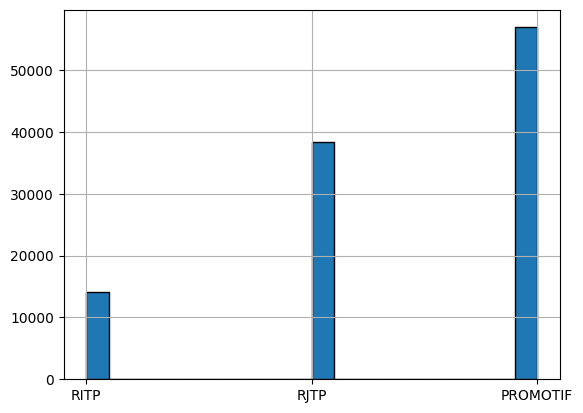

In [ ]:
df['PNK11'].hist(edgecolor='black', bins=20);

### Check Corellation

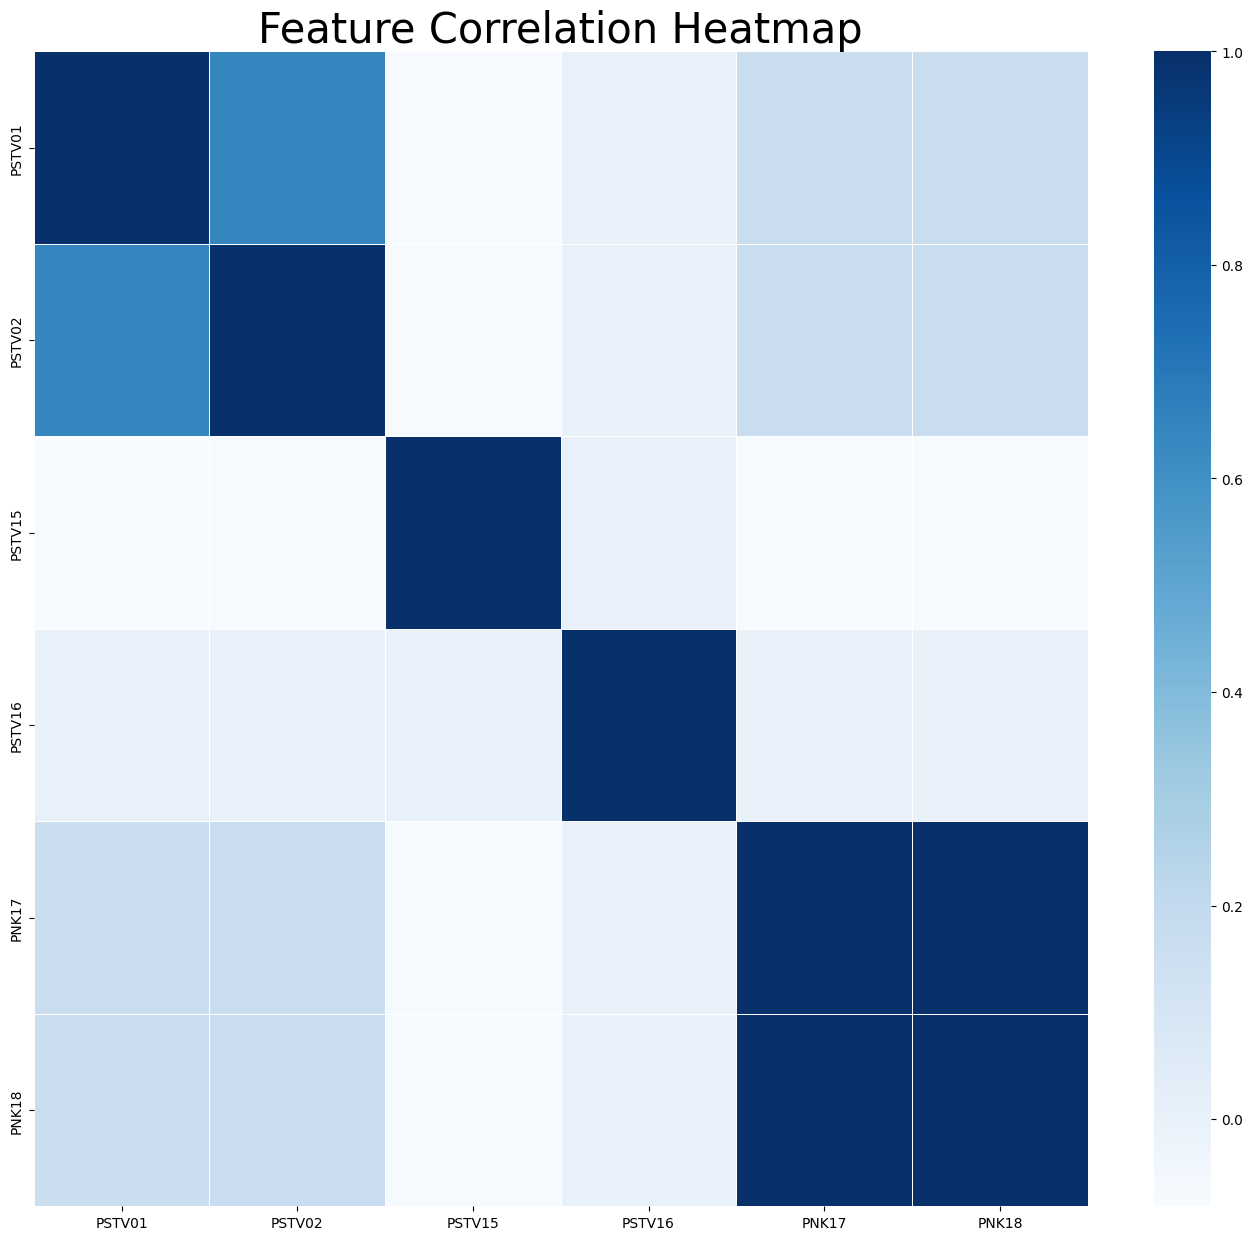

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap show the correlation between features
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', linewidths=.5)

plt.title('Feature Correlation Heatmap', fontsize=30)

plt.show()

### Drop Unwanted Feature

In [ ]:
df.drop(['PSTV18', 'PSTV17', 'PSTV16', 'PSTV11', 'PSTV12',
         'PSTV08', 'PSTV13', 'PSTV07', 'PSTV04','PSTV06',
         'PNK13A', 'PNK12', 'PSTV05', 'PNK06', 'PNK09', 'PNK08'], axis = 1, inplace = True)

In [ ]:
df.drop(['PSTV18', 'PSTV17', 'PSTV16', 'PSTV11', 'PSTV12',
         'PSTV08', 'PSTV13', 'PSTV07', 'PSTV04','PSTV06',
         'PNK13A', 'PNK12', 'PSTV05', 'PNK06', 'PNK09',], axis = 1, inplace = True)

### Check Data Imbalanced

In [ ]:
All = df.shape[0]
RITP = df[df['PNK11'] == 'RITP']
RJTP = df[df['PNK11'] == 'RJTP']
PROMOTIF = df[df['PNK11'] == 'PROMOTIF']

totalRITP = len(RITP)/All
totalRJTP = len(RJTP)/All
totalPromotif = len(PROMOTIF)/All

print('RITP :', totalRITP * 100, '%')
print('RJTP :', totalRJTP * 100, '%')
print('PROMOTIF :', totalPromotif * 100, '%')

RITP : 12.933987340037815 %
RJTP : 35.045077138081275 %
PROMOTIF : 52.02093552188091 %


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

train_data = pd.concat([X_train, Y_train], axis=1)
class_counts = Y_train['PNK11'].value_counts()
undersample_size = min(class_counts)
rus = RandomUnderSampler(sampling_strategy={0: undersample_size, 1: undersample_size, 2: undersample_size}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train['PNK11'])
print(pd.Series(y_resampled).value_counts(normalize=True))

0    0.333333
1    0.333333
2    0.333333
Name: PNK11, dtype: float64


## Transformasi

In [ ]:
df['PNK11'].replace(to_replace = ['RITP', 'RJTP', 'PROMOTIF'], value = [2, 1, 0], inplace = True)

In [ ]:
data_categorical = df.select_dtypes(include=['object']).copy()

In [ ]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109479 entries, 0 to 109478
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PSTV03  109479 non-null  object
 1   PSTV09  109479 non-null  object
 2   PSTV10  109479 non-null  object
 3   PSTV14  109479 non-null  object
 4   PNK02   109479 non-null  object
 5   PNK03   109479 non-null  object
 6   PNK04   109479 non-null  object
 7   PNK05   109479 non-null  object
 8   PNK07   109479 non-null  object
 9   PNK13   109473 non-null  object
 10  PNK14   109479 non-null  object
 11  PNK15   109479 non-null  object
 12  PNK16   109479 non-null  object
dtypes: object(13)
memory usage: 10.9+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
df['PSTV03'] = LE.fit_transform(df['PSTV03'])
#df['PSTV04'] = LE.fit_transform(df['PSTV04'])
#df['PSTV05'] = LE.fit_transform(df['PSTV05'])
#df['PSTV06'] = LE.fit_transform(df['PSTV06'])
#df['PSTV12'] = LE.fit_transform(df['PSTV12'])
#df['PSTV07'] = LE.fit_transform(df['PSTV07'])
df['PSTV09'] = LE.fit_transform(df['PSTV09'])
df['PSTV10'] = LE.fit_transform(df['PSTV10'])
#df['PSTV11'] = LE.fit_transform(df['PSTV11'])
#df['PSTV13'] = LE.fit_transform(df['PSTV13'])
df['PSTV14'] = LE.fit_transform(df['PSTV14'])
#df['PSTV17'] = LE.fit_transform(df['PSTV17'])
#df['PSTV18'] = LE.fit_transform(df['PSTV18'])
df['PNK02'] = LE.fit_transform(df['PNK02'])
df['PNK03'] = LE.fit_transform(df['PNK03'])
df['PNK04'] = LE.fit_transform(df['PNK04'])
df['PNK05'] = LE.fit_transform(df['PNK05'])
#df['PNK06'] = LE.fit_transform(df['PNK06'])
df['PNK07'] = LE.fit_transform(df['PNK07'])
#df['PNK08'] = LE.fit_transform(df['PNK08'])
#df['PNK09'] = LE.fit_transform(df['PNK09'])
df['PNK10'] = LE.fit_transform(df['PNK10'])
#df['PSTV08'] = LE.fit_transform(df['PSTV08'])
#df['PNK12'] = LE.fit_transform(df['PSTV12'])
df['PNK13'] = LE.fit_transform(df['PNK13'])
#df['PNK13A'] = LE.fit_transform(df['PNK13A'])
df['PNK14'] = LE.fit_transform(df['PNK14'])
df['PNK15'] = LE.fit_transform(df['PNK15'])
df['PNK16'] = LE.fit_transform(df['PNK16'])

In [ ]:
df['PSTV03'] = LE.fit_transform(df['PSTV03'])
df['PSTV04'] = LE.fit_transform(df['PSTV04'])
df['PSTV05'] = LE.fit_transform(df['PSTV05'])
df['PSTV06'] = LE.fit_transform(df['PSTV06'])
df['PSTV07'] = LE.fit_transform(df['PSTV07'])
df['PSTV08'] = LE.fit_transform(df['PSTV08'])
df['PSTV09'] = LE.fit_transform(df['PSTV09'])
df['PSTV10'] = LE.fit_transform(df['PSTV10'])
df['PSTV11'] = LE.fit_transform(df['PSTV11'])
df['PSTV12'] = LE.fit_transform(df['PSTV12'])
df['PSTV13'] = LE.fit_transform(df['PSTV13'])
df['PSTV14'] = LE.fit_transform(df['PSTV14'])
df['PSTV17'] = LE.fit_transform(df['PSTV17'])
df['PNK02'] = LE.fit_transform(df['PNK02'])
df['PNK03'] = LE.fit_transform(df['PNK03'])
df['PNK04'] = LE.fit_transform(df['PNK04'])
df['PNK05'] = LE.fit_transform(df['PNK05'])
df['PNK06'] = LE.fit_transform(df['PNK06'])
df['PNK07'] = LE.fit_transform(df['PNK07'])
df['PNK08'] = LE.fit_transform(df['PNK08'])
df['PNK09'] = LE.fit_transform(df['PNK09'])
df['PNK10'] = LE.fit_transform(df['PNK10'])
df['PNK12'] = LE.fit_transform(df['PSTV12'])
df['PNK13'] = LE.fit_transform(df['PNK13'])
df['PNK13A'] = LE.fit_transform(df['PNK13A'])
df['PNK14'] = LE.fit_transform(df['PNK14'])
df['PNK15'] = LE.fit_transform(df['PNK15'])
df['PNK16'] = LE.fit_transform(df['PNK16'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109479 entries, 0 to 109478
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PSTV01  109479 non-null  int64  
 1   PSTV02  109479 non-null  int64  
 2   PSTV03  109479 non-null  int64  
 3   PSTV09  109479 non-null  int64  
 4   PSTV10  109479 non-null  int64  
 5   PSTV14  109479 non-null  int64  
 6   PSTV15  109479 non-null  float64
 7   PNK02   109479 non-null  int64  
 8   PNK03   109479 non-null  int64  
 9   PNK04   109479 non-null  int64  
 10  PNK05   109479 non-null  int64  
 11  PNK07   109479 non-null  int64  
 12  PNK10   109479 non-null  int64  
 13  PNK11   109479 non-null  int64  
 14  PNK13   109479 non-null  int64  
 15  PNK14   109479 non-null  int64  
 16  PNK15   109479 non-null  int64  
 17  PNK16   109479 non-null  int64  
 18  PNK17   109479 non-null  int64  
 19  PNK18   109479 non-null  int64  
dtypes: float64(1), int64(19)
memory usage: 16.7 MB


## Preprocessing data for Classification

### Splitting data in X and Y

In [ ]:
X = df.drop(['PNK11'], axis=1)
Y = df[['PNK11']]

In [ ]:
X

,PSTV01,PSTV02,PSTV03,PSTV09,PSTV10,PSTV14,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK07,PNK10,PNK13,PNK14,PNK15,PNK16,PNK17,PNK18
0,328537885,328537885,4168,0,6,6,9.436164,18503,1937,1937,1931,6,7,388,813,951,16,700000,700000
1,328537885,328537885,4168,0,6,6,9.436164,18503,1937,1937,1931,6,7,388,813,951,16,700000,700000
2,328537885,328537885,4168,0,6,6,9.436164,18503,1937,1937,1931,6,7,388,813,951,16,700000,700000
3,75453396,75453396,1169,9,56,56,10.173553,13835,1651,1650,1644,54,7,424,874,272,1,161700,161700
4,75453396,75453396,1169,9,56,56,10.173553,13835,1651,1650,1644,54,7,424,874,272,1,161700,161700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,426032113,408166141,3224,27,448,312,2.280302,6204,1445,1444,1438,300,5,434,895,749,16,700000,700000
109475,426032113,408166141,3224,27,448,312,2.280302,6204,1445,1444,1438,300,5,434,895,749,16,700000,700000
109476,402406574,402406574,1173,21,441,440,5.218708,12868,1578,1577,1571,420,7,247,508,340,1,80000,80000
109477,402406574,402406574,1173,21,441,440,5.218708,12868,1578,1577,1571,420,7,247,508,340,1,80000,80000


In [ ]:
Y

,PNK11
0,2
1,2
2,2
3,1
4,1
...,...
109474,2
109475,2
109476,1
109477,1


### Splitting data in train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (83751, 19)
X_val (14780, 19)
X_test (10948, 19)


In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
#print(f"Shape of X_train is: {X_train.shape}")
#print(f"Shape of Y_train is: {Y_train.shape}\n")
#print(f"Shape of X_test is: {X_test.shape}")
#print(f"Shape of Y_test is: {Y_test.shape}")

## Creating ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu', max_iter=1000, epsilon=1e-08)

In [ ]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi Validasi Training ANN: 0.7554803788903924


In [ ]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.7580379978078188


In [ ]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, 3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [ ]:
classifier = Sequential()
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(3,activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
result = classifier.fit(X_train, Y_train, epochs=10,batch_size=5, validation_data=(X_val,Y_val))

Epoch 1/10
16751/16751 [==============================] - 37s 2ms/step - loss: 493238.2812 - acc: 0.4798 - val_loss: 95844.9141 - val_acc: 0.5903
Epoch 2/10
16751/16751 [==============================] - 36s 2ms/step - loss: 175350.1094 - acc: 0.5344 - val_loss: 110457.2266 - val_acc: 0.5666
Epoch 3/10
16751/16751 [==============================] - 35s 2ms/step - loss: 34235.4219 - acc: 0.5598 - val_loss: 108.3159 - val_acc: 0.5131
Epoch 4/10
16751/16751 [==============================] - 35s 2ms/step - loss: 28.7627 - acc: 0.5244 - val_loss: 3.5042 - val_acc: 0.5072
Epoch 5/10
16751/16751 [==============================] - 35s 2ms/step - loss: 4.9780 - acc: 0.5233 - val_loss: 1.8972 - val_acc: 0.5072
Epoch 6/10
16751/16751 [==============================] - 35s 2ms/step - loss: 1.4360 - acc: 0.5233 - val_loss: 1.0750 - val_acc: 0.5072
Epoch 7/10
16751/16751 [==============================] - 34s 2ms/step - loss: 1.0618 - acc: 0.5233 - val_loss: 1.0758 - val_acc: 0.5072
Epoch 8/10
1675

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1475 (5.76 KB)
Trainable params: 1475 (5.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.metrics import confusion_matrix

loss, accuracy = classifier.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

343/343 [==============================] - 1s 2ms/step - loss: 1.2290 - acc: 0.5164
Akurasi Testing ANN: 0.5164413452148438


In [ ]:
from keras.utils import to_categorical

Y_test_one_hot = to_categorical(Y_test, num_classes=3)

## Evaluation Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Your other import statements and code here...

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)

# Menghitung akurasi
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

# Menghitung confusion matrix
cm = confusion_matrix(Y_val, prediksi_val)
print('Confusion Matrix:')
print(cm)

# Menampilkan classification report
print('Classification Report:')
print(classification_report(Y_val, prediksi_val))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi Validasi Training ANN: 0.7317320703653586
Confusion Matrix:
[[5952 1422  118]
 [ 799 3771  744]
 [  42  840 1092]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7492
           1       0.63      0.71      0.66      5314
           2       0.56      0.55      0.56      1974

    accuracy                           0.73     14780
   macro avg       0.69      0.69      0.68     14780
weighted avg       0.74      0.73      0.74     14780



## Visualizing Model Layers

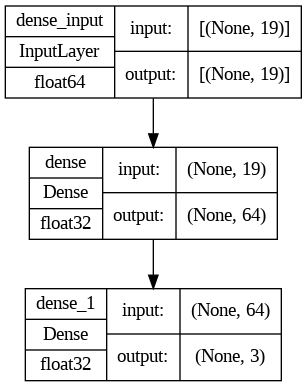

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(classifier,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

In [ ]:
acc = result.history['acc']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [ ]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])


,Accuracy,Loss,Epoch
0,0.479779,493238.281250,1
1,0.534394,175350.109375,2
2,0.559790,34235.421875,3
3,0.524447,28.762737,4
4,0.523337,4.977989,5
5,0.523289,1.435958,6
6,0.523313,1.061752,7
7,0.523289,0.969529,8
8,0.523289,0.969555,9
9,0.523289,0.969526,10


In [ ]:
import plotly.graph_objs as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Loss'],
                         mode='lines+markers',
                         name = 'Loss'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Training Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy / Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()